In [1]:
  !curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


Images scraped with the code in notebook 01 and then cleaned up with the code in notebook 02

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!ls 'drive/My Drive/Colab Notebooks/FastAI/Lesson 1'

'01 Image Downloader.ipynb'	        haarcascade_eye.xml
'02 Face Detection with OpenCV.ipynb'   haarcascade_frontalface_default.xml
'03 Train the Super Model.ipynb'        Images
 557px-Lily_Cole_2012.jpg


In [0]:
root_dir = "/content/drive/My Drive/Colab Notebooks/FastAI/Lesson 1/"

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [0]:
bs = 32

In [0]:
path = root_dir + 'Images'

In [9]:
path

'/content/drive/My Drive/Colab Notebooks/FastAI/Lesson 1/Images'

In [0]:
import os

In [11]:
os.listdir(path)

['valid', 'train', 'models']

In [0]:
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, size=224, bs=bs)

In [13]:
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (424 items)
x: ImageItemList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
lily cole,lily cole,lily cole,lily cole,lily cole
Path: /content/drive/My Drive/Colab Notebooks/FastAI/Lesson 1/Images;

Valid: LabelList (177 items)
x: ImageItemList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
lily cole,lily cole,lily cole,lily cole,lily cole
Path: /content/drive/My Drive/Colab Notebooks/FastAI/Lesson 1/Images;

Test: None

In [14]:
data.classes

['cindy crawford',
 'claudia schiffer',
 'kate moss',
 'kate upton',
 'lily cole',
 'miranda kerr',
 'naomi campbell']

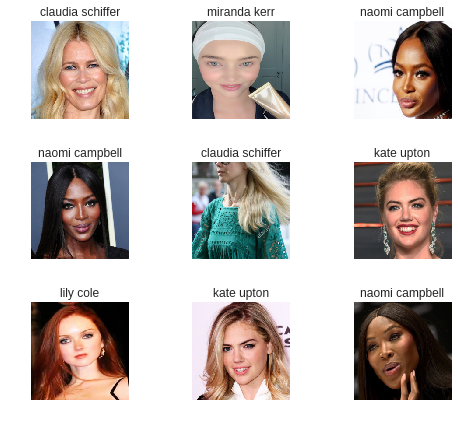

In [15]:
data.show_batch(rows=3, figsize=(7,6))

In [0]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [17]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate
1,2.133850,1.433560,0.525424
2,1.526835,0.936167,0.333333
3,1.169056,0.857579,0.282486
4,0.963396,0.833136,0.288136


In [0]:
learn.save('stage-1')

In [19]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

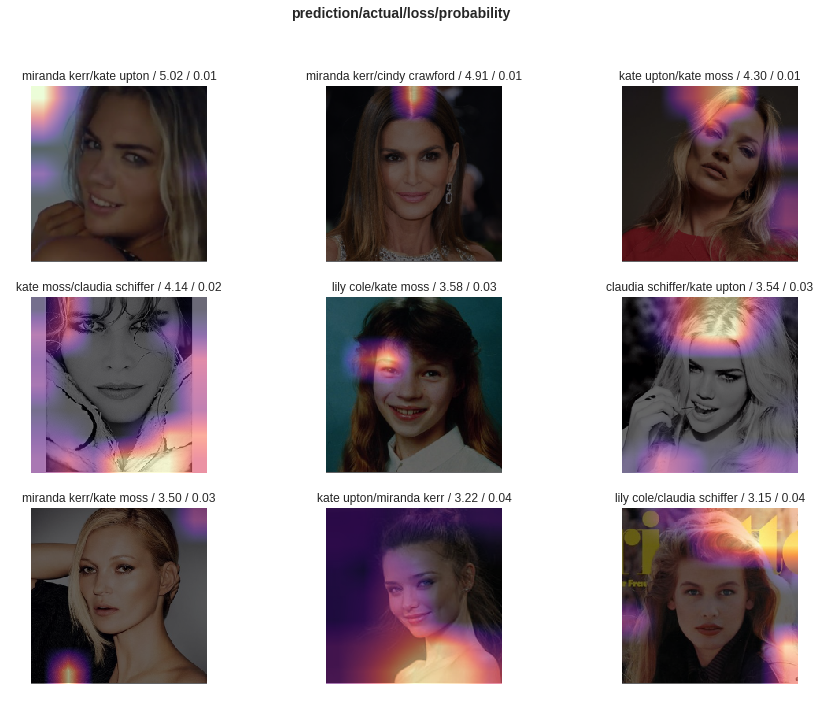

In [20]:
interp.plot_top_losses(9, figsize=(15,11))

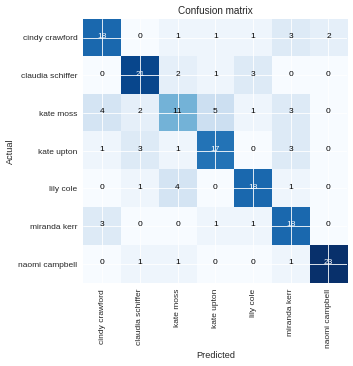

In [21]:
interp.plot_confusion_matrix(figsize=(6,6), dpi=60)

In [22]:
interp.most_confused(min_val=2)

[('kate moss', 'kate upton', 5),
 ('kate moss', 'cindy crawford', 4),
 ('lily cole', 'kate moss', 4),
 ('cindy crawford', 'miranda kerr', 3),
 ('claudia schiffer', 'lily cole', 3),
 ('kate moss', 'miranda kerr', 3),
 ('kate upton', 'claudia schiffer', 3),
 ('kate upton', 'miranda kerr', 3),
 ('miranda kerr', 'cindy crawford', 3)]

In [0]:
learn.unfreeze()

In [24]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate
1,0.590280,1.107903,0.271186


In [25]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (424 items)
x: ImageItemList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
lily cole,lily cole,lily cole,lily cole,lily cole
Path: /content/drive/My Drive/Colab Notebooks/FastAI/Lesson 1/Images;

Valid: LabelList (177 items)
x: ImageItemList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
lily cole,lily cole,lily cole,lily cole,lily cole
Path: /content/drive/My Drive/Colab Notebooks/FastAI/Lesson 1/Images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 6

In [26]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 2.75E-04


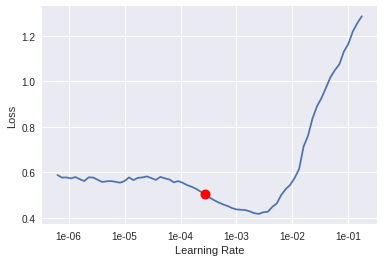

In [27]:
learn.recorder.plot()

In [28]:
learn.unfreeze()
learn.fit_one_cycle(12, max_lr=slice(1e-4,1e-3))

epoch,train_loss,valid_loss,error_rate
1,0.564734,0.638221,0.248588
2,0.398127,0.742661,0.237288
3,0.405408,1.949954,0.350282
4,0.515707,6.720336,0.604520
5,0.545687,3.018317,0.355932
6,0.485921,1.128758,0.214689
7,0.423581,0.827959,0.203390
8,0.356590,0.675124,0.220339
9,0.309913,0.526367,0.146893
10,0.268623,0.433652,0.129944


In [29]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

True

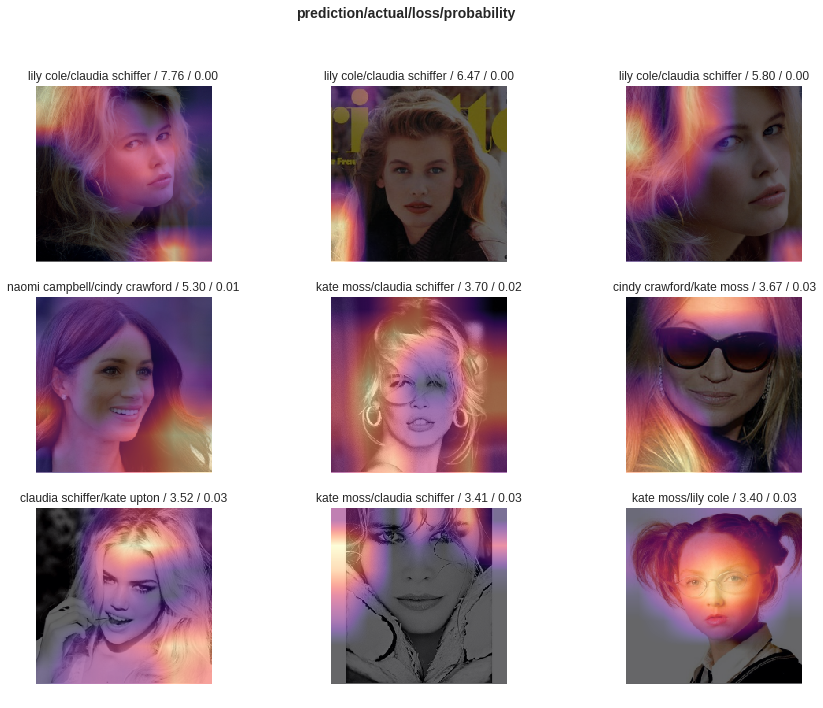

In [30]:
interp.plot_top_losses(9, figsize=(15,11))

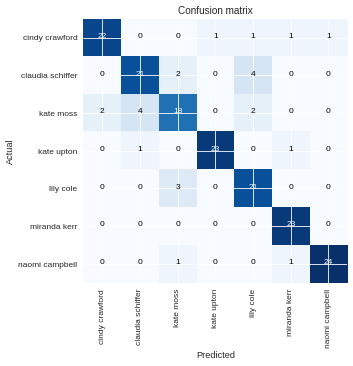

In [31]:
interp.plot_confusion_matrix(figsize=(6,6), dpi=60)

In [32]:
interp.most_confused(min_val=2)

[('claudia schiffer', 'lily cole', 4),
 ('kate moss', 'claudia schiffer', 4),
 ('lily cole', 'kate moss', 3)]